In [1]:
from kohonen import Kohonen
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [11]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
def prewitt_filter (img):
#img = cv2.imread('1.png')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
    img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
    img_res = []
    img_res.append(gray)
    img_res.append(img_prewittx)
    img_res.append(img_prewitty)
    #img_res = np.array(img_res)
    
    return img_res

# img_canny = cv2.Canny(img,100,200)
# b, g, r = cv2.split(img)
# b = cv2.Canny(b,100,200)
# g = cv2.Canny(g,100,200)

In [3]:
# i1 = prewitt_filter(cv2.imread('1.png'))

In [4]:
# len(i1)

In [5]:
# from scipy import ndimage, misc
# b, g, r = cv2.split(img)
# b = cv2.Canny(b,100,200)
# g = cv2.Canny(g,100,200)
# r = cv2.Canny(r,100,200) 
    
# fig = plt.figure()
# plt.gray()  # show the filtered result in grayscale
# ax1 = fig.add_subplot(121)  # left side
# ax2 = fig.add_subplot(122)  # right side
# ascent = gray #misc.ascent()
# result = ndimage.prewitt(ascent)
# ax1.imshow(img_prewittx)
# ax2.imshow(i1[2])
# plt.show()

In [6]:
# def Canny_fnc(img):
#     im = []
#     b, g, r = cv2.split(img)
#     b = cv2.Canny(b,100,200)
#     im.append(b)
#     g = cv2.Canny(g,100,200)
#     im.append(g)
#     r = cv2.Canny(r,100,200)    
#     im.append(r)
#     return im

In [3]:
VEC_LEN = 10800
DECAY_RATE = 0.95
MIN_ALPHA = 0.01
RADIUS_REDUCTION_POINT = 0.023  # Last 20% of iterations.

In [7]:
weights = {}
number_of_clusters = 14

for i in range(number_of_clusters):
    weight_list = np.zeros((10800), np.float32)

    weight_list[:] = [random.uniform(0.1, 0.9) for i in range(10800)]

    weights.update({i: weight_list})
weights

{0: array([0.63212836, 0.371815  , 0.3790791 , ..., 0.6565028 , 0.26267025,
        0.6889011 ], dtype=float32),
 1: array([0.6804703 , 0.82812715, 0.64191544, ..., 0.86262876, 0.14323443,
        0.40692186], dtype=float32),
 2: array([0.42994118, 0.6906633 , 0.8036372 , ..., 0.3499453 , 0.4305386 ,
        0.4816605 ], dtype=float32),
 3: array([0.6179388 , 0.3220104 , 0.77531976, ..., 0.39092442, 0.4481044 ,
        0.7086945 ], dtype=float32),
 4: array([0.18668696, 0.68503284, 0.80593413, ..., 0.7301718 , 0.8230348 ,
        0.145361  ], dtype=float32),
 5: array([0.15148658, 0.88604623, 0.52291834, ..., 0.34159297, 0.18961002,
        0.17483066], dtype=float32),
 6: array([0.34744313, 0.74907887, 0.3633596 , ..., 0.2212183 , 0.33195803,
        0.62947845], dtype=float32),
 7: array([0.48843193, 0.6363019 , 0.763307  , ..., 0.2867495 , 0.13757756,
        0.8300163 ], dtype=float32),
 8: array([0.2357121 , 0.23551798, 0.7551163 , ..., 0.21345411, 0.19401924,
        0.4396887 ],

In [8]:
path = "./IMG/mix"
# path = "./IMG/test"
files = [ f for f in listdir(path) if isfile(join(path,f)) ]
images = np.empty(len(files), dtype=object)

for n in range(0, len(files)):
    image = cv2.imread(join(path, files[n]))
    image = cv2.resize(image, (60, 60)) 
    img = np.array(prewitt_filter(image)) / 255
    images[n] = np.array(img).flatten()#np.array(img_canny).flatten()
# images

In [9]:
clusters = []
names = []

centres = weights
for name in centres:
    clusters.append(centres[name])
    names.append(name)
clusters

[array([0.63212836, 0.371815  , 0.3790791 , ..., 0.6565028 , 0.26267025,
        0.6889011 ], dtype=float32),
 array([0.6804703 , 0.82812715, 0.64191544, ..., 0.86262876, 0.14323443,
        0.40692186], dtype=float32),
 array([0.42994118, 0.6906633 , 0.8036372 , ..., 0.3499453 , 0.4305386 ,
        0.4816605 ], dtype=float32),
 array([0.6179388 , 0.3220104 , 0.77531976, ..., 0.39092442, 0.4481044 ,
        0.7086945 ], dtype=float32),
 array([0.18668696, 0.68503284, 0.80593413, ..., 0.7301718 , 0.8230348 ,
        0.145361  ], dtype=float32),
 array([0.15148658, 0.88604623, 0.52291834, ..., 0.34159297, 0.18961002,
        0.17483066], dtype=float32),
 array([0.34744313, 0.74907887, 0.3633596 , ..., 0.2212183 , 0.33195803,
        0.62947845], dtype=float32),
 array([0.48843193, 0.6363019 , 0.763307  , ..., 0.2867495 , 0.13757756,
        0.8300163 ], dtype=float32),
 array([0.2357121 , 0.23551798, 0.7551163 , ..., 0.21345411, 0.19401924,
        0.4396887 ], dtype=float32),
 array([0.

Epoch: 1 | Progress: 100% | Alpha: 0.6 | Eps: 0.01
Epoch: 2 | Progress: 100% | Alpha: 0.57 | Eps: 0.01
Epoch: 3 | Progress: 100% | Alpha: 0.5415 | Eps: 0.01
Epoch: 4 | Progress: 100% | Alpha: 0.5144 | Eps: 0.01
Epoch: 5 | Progress: 100% | Alpha: 0.4887 | Eps: 0.01
Epoch: 6 | Progress: 100% | Alpha: 0.4643 | Eps: 0.01
Epoch: 7 | Progress: 100% | Alpha: 0.4411 | Eps: 0.01
Epoch: 8 | Progress: 100% | Alpha: 0.419 | Eps: 0.01
Epoch: 9 | Progress: 100% | Alpha: 0.3981 | Eps: 0.01
Epoch: 10 | Progress: 100% | Alpha: 0.3781 | Eps: 0.01
Epoch: 11 | Progress: 100% | Alpha: 0.3592 | Eps: 0.01
Epoch: 12 | Progress: 100% | Alpha: 0.3413 | Eps: 0.01
Epoch: 13 | Progress: 100% | Alpha: 0.3242 | Eps: 0.01
Epoch: 14 | Progress: 100% | Alpha: 0.308 | Eps: 0.01
Epoch: 15 | Progress: 100% | Alpha: 0.2926 | Eps: 0.01
Epoch: 16 | Progress: 100% | Alpha: 0.278 | Eps: 0.01
Epoch: 17 | Progress: 100% | Alpha: 0.2641 | Eps: 0.01
Epoch: 18 | Progress: 100% | Alpha: 0.2509 | Eps: 0.01
Epoch: 19 | Progress: 100% 

<Figure size 1440x1440 with 0 Axes>

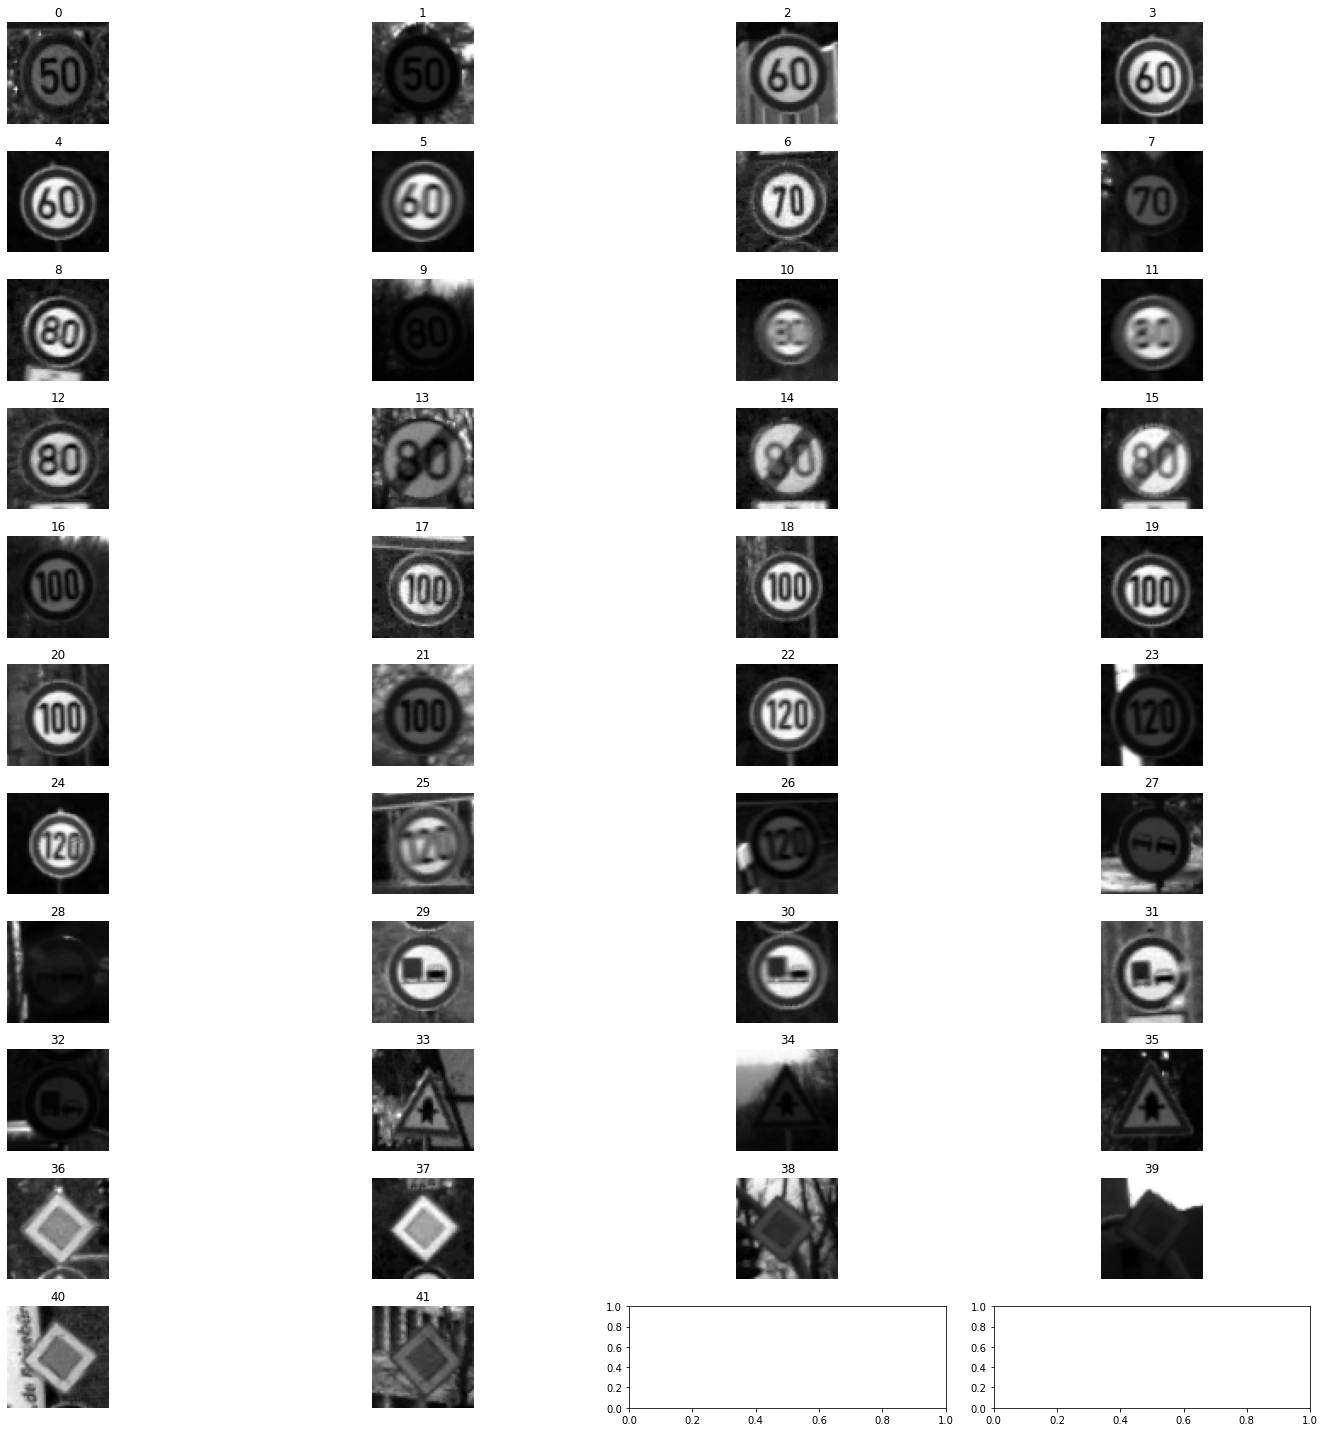

CLUSTER: 1


<Figure size 1440x1440 with 0 Axes>

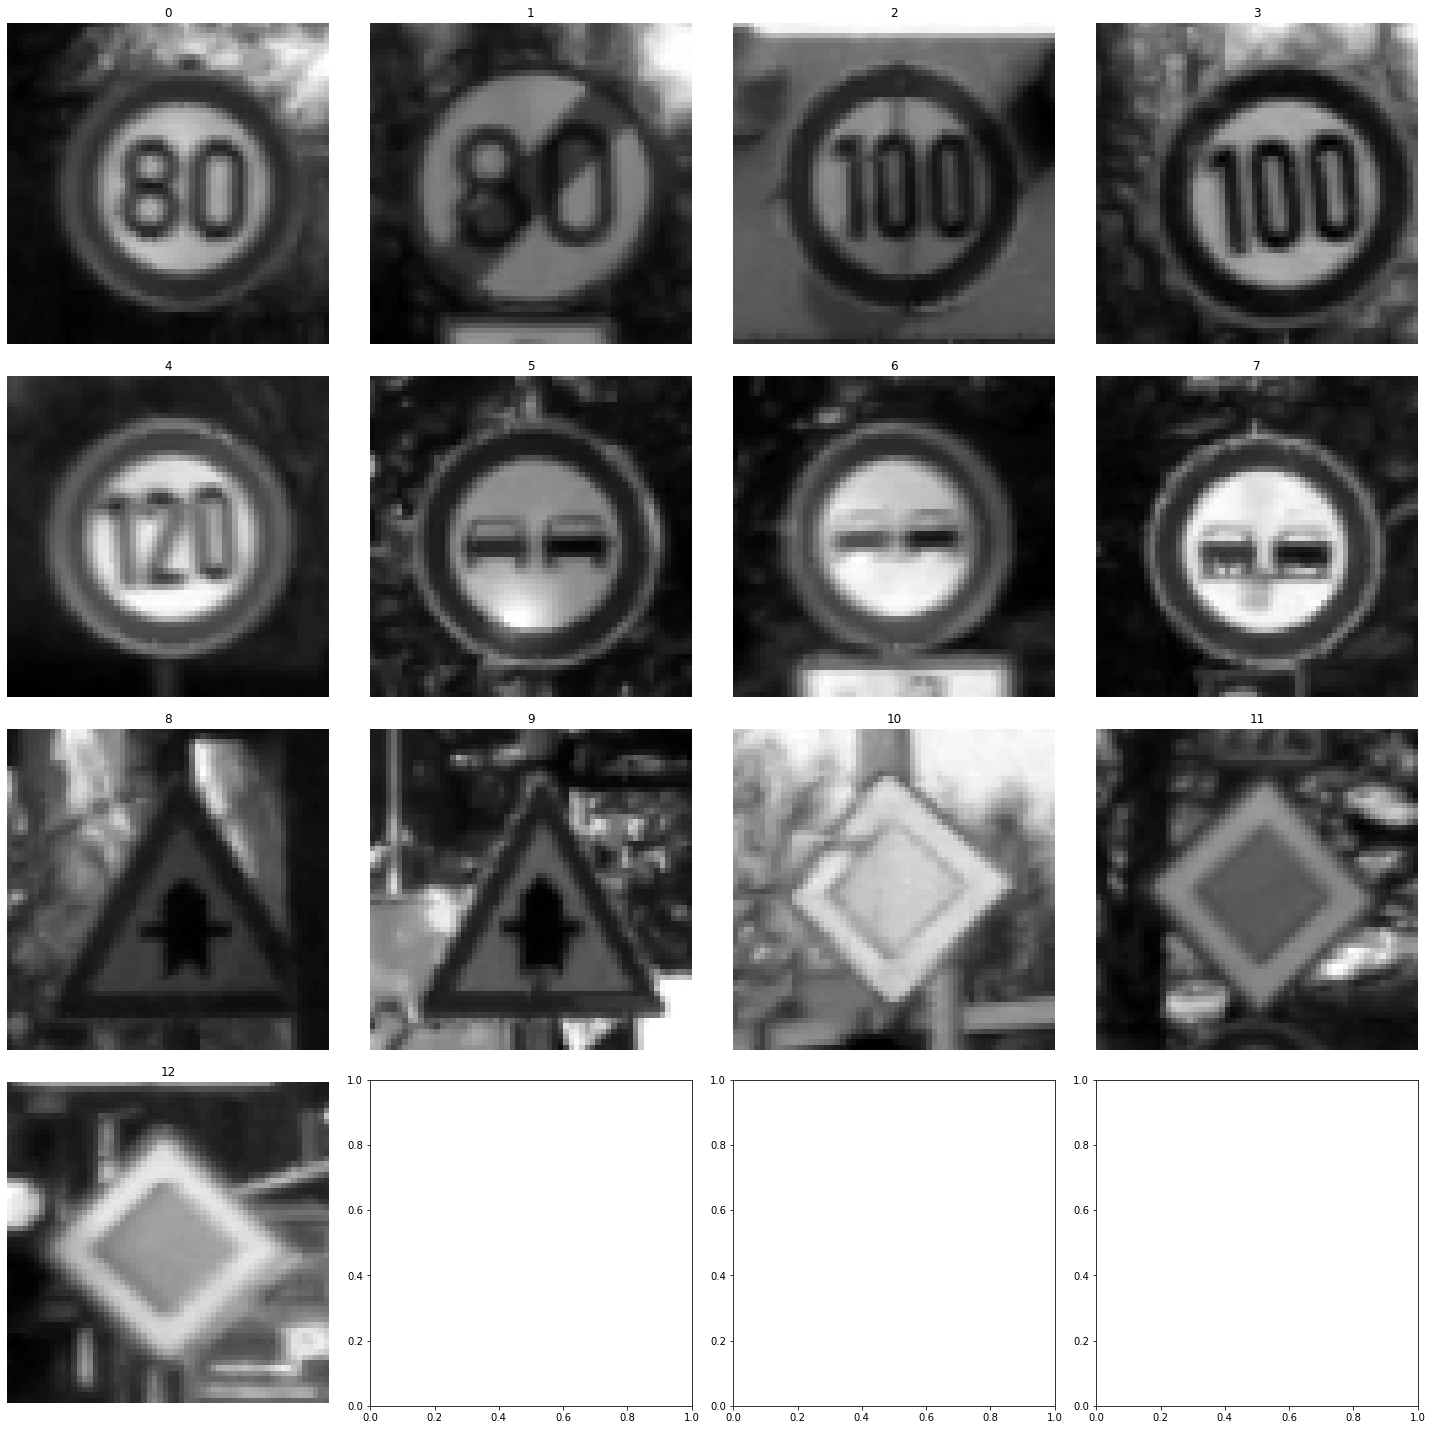

CLUSTER: 2


<Figure size 1440x1440 with 0 Axes>

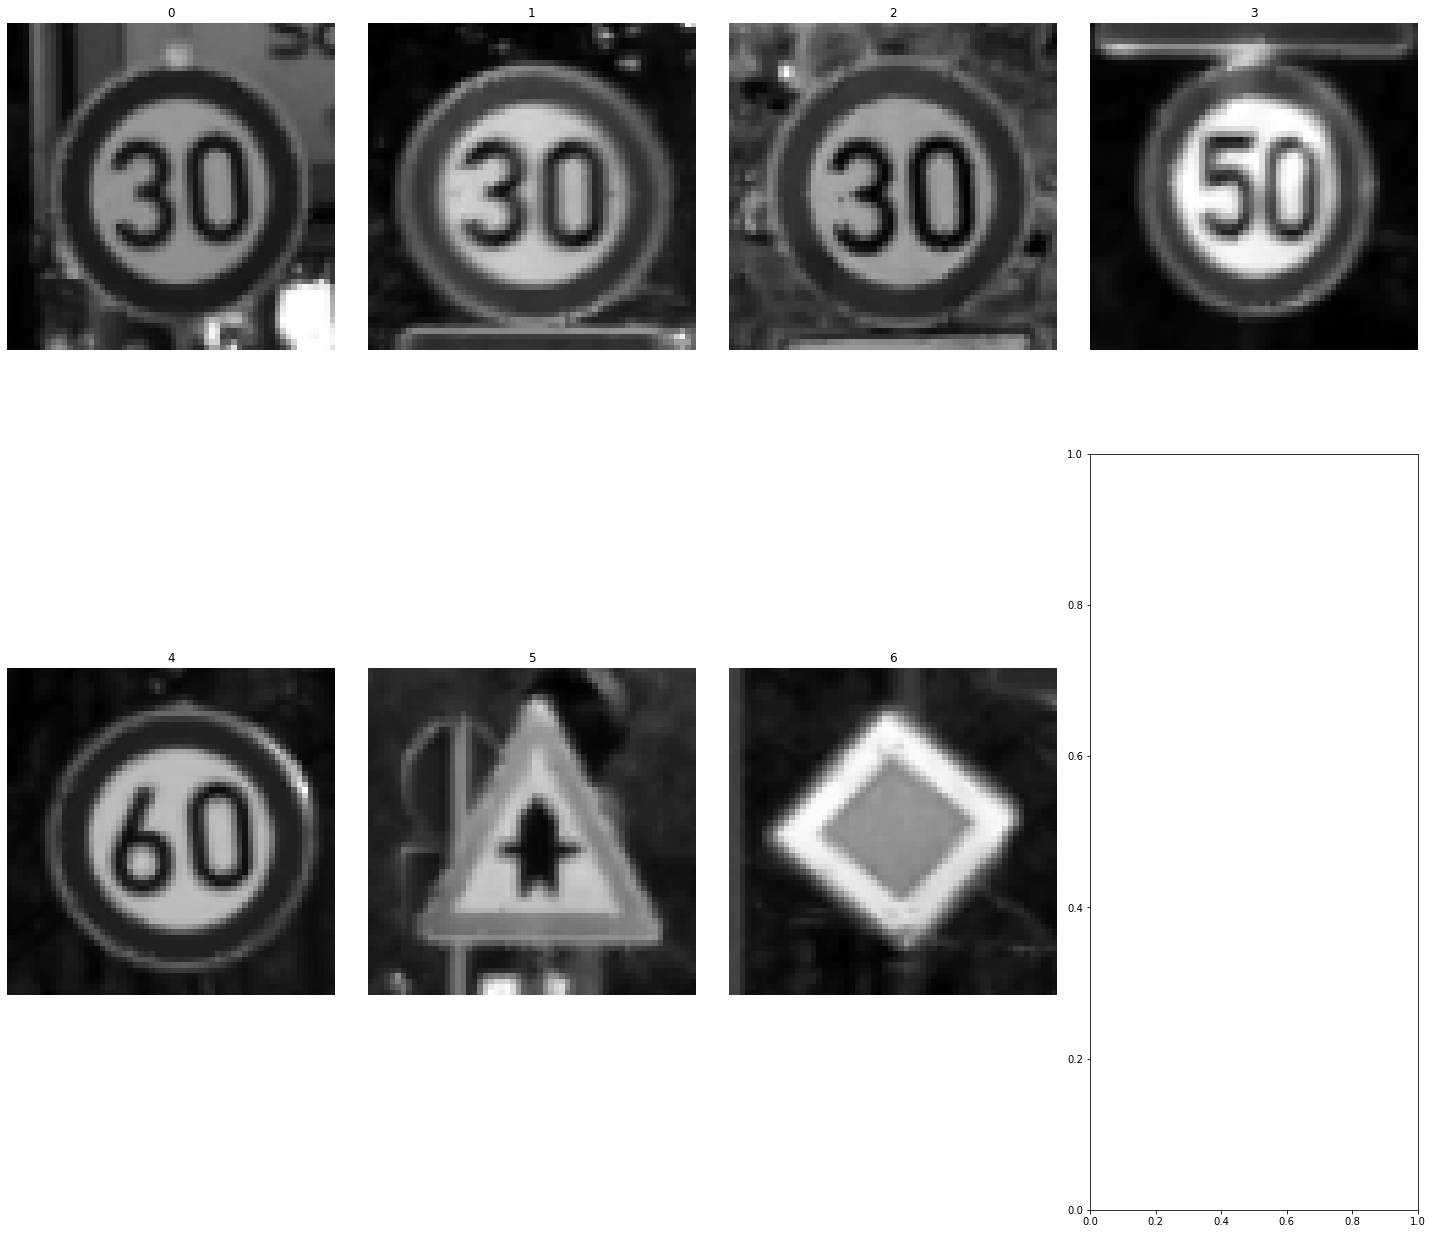

CLUSTER: 3


<Figure size 1440x1440 with 0 Axes>

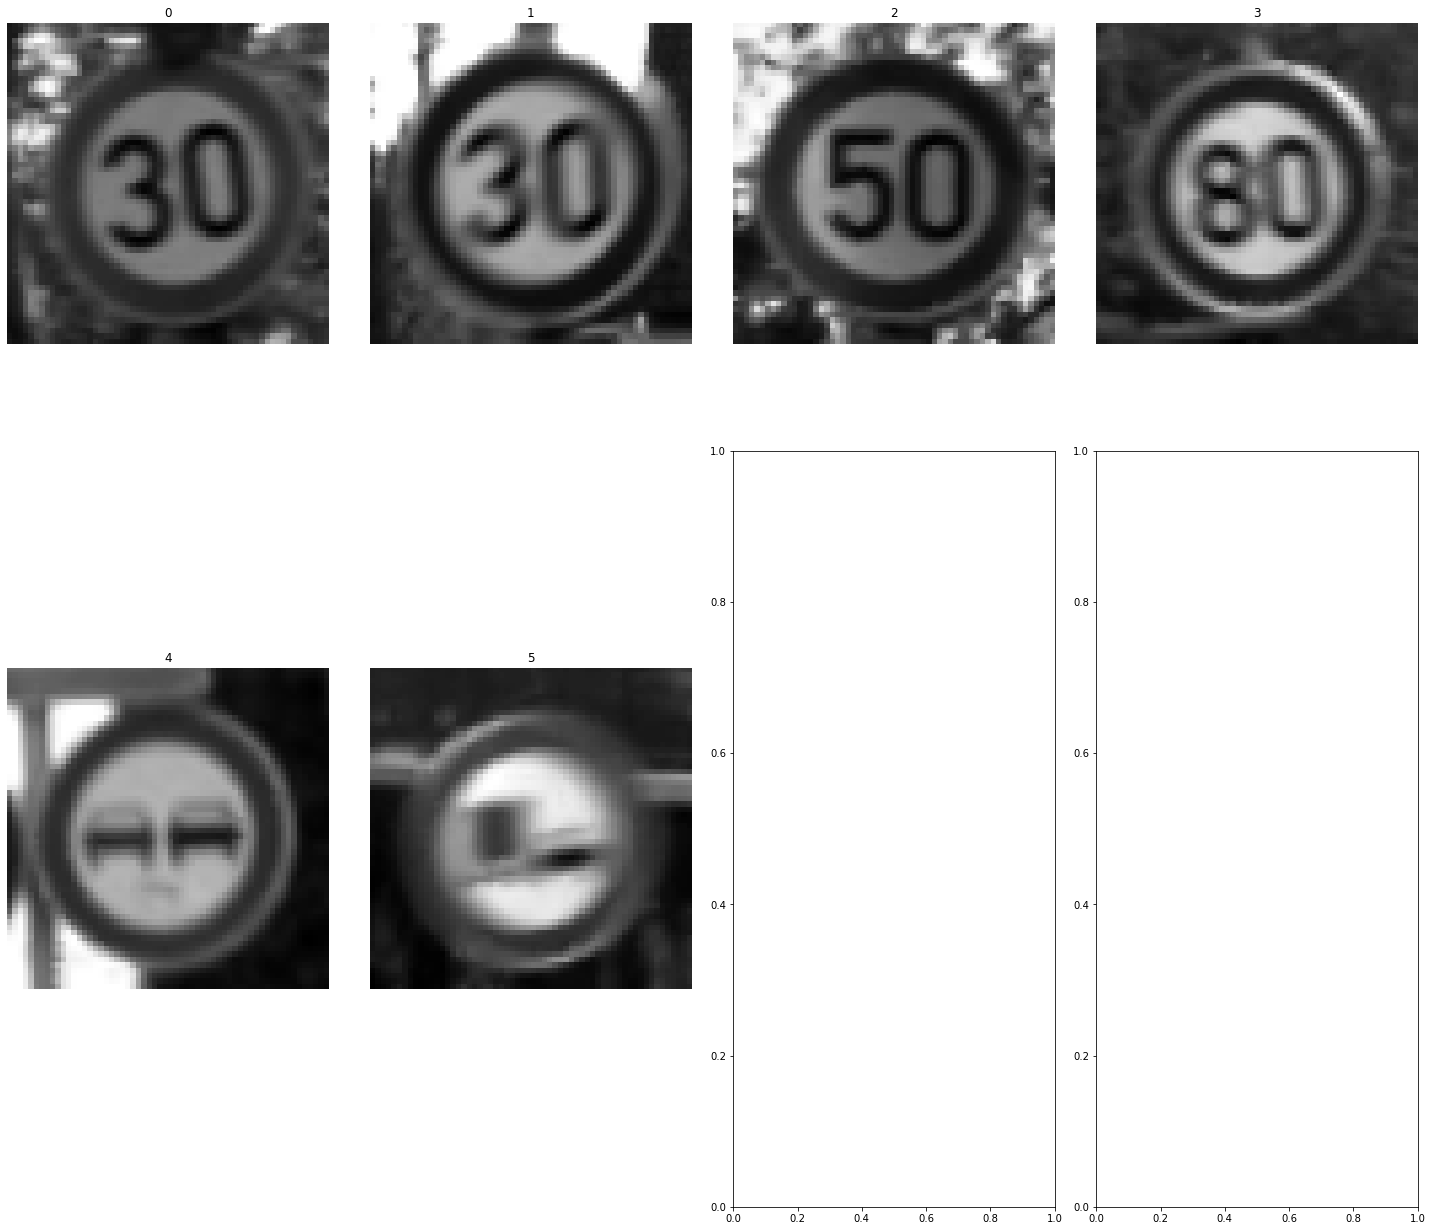

CLUSTER: 4


<Figure size 1440x1440 with 0 Axes>

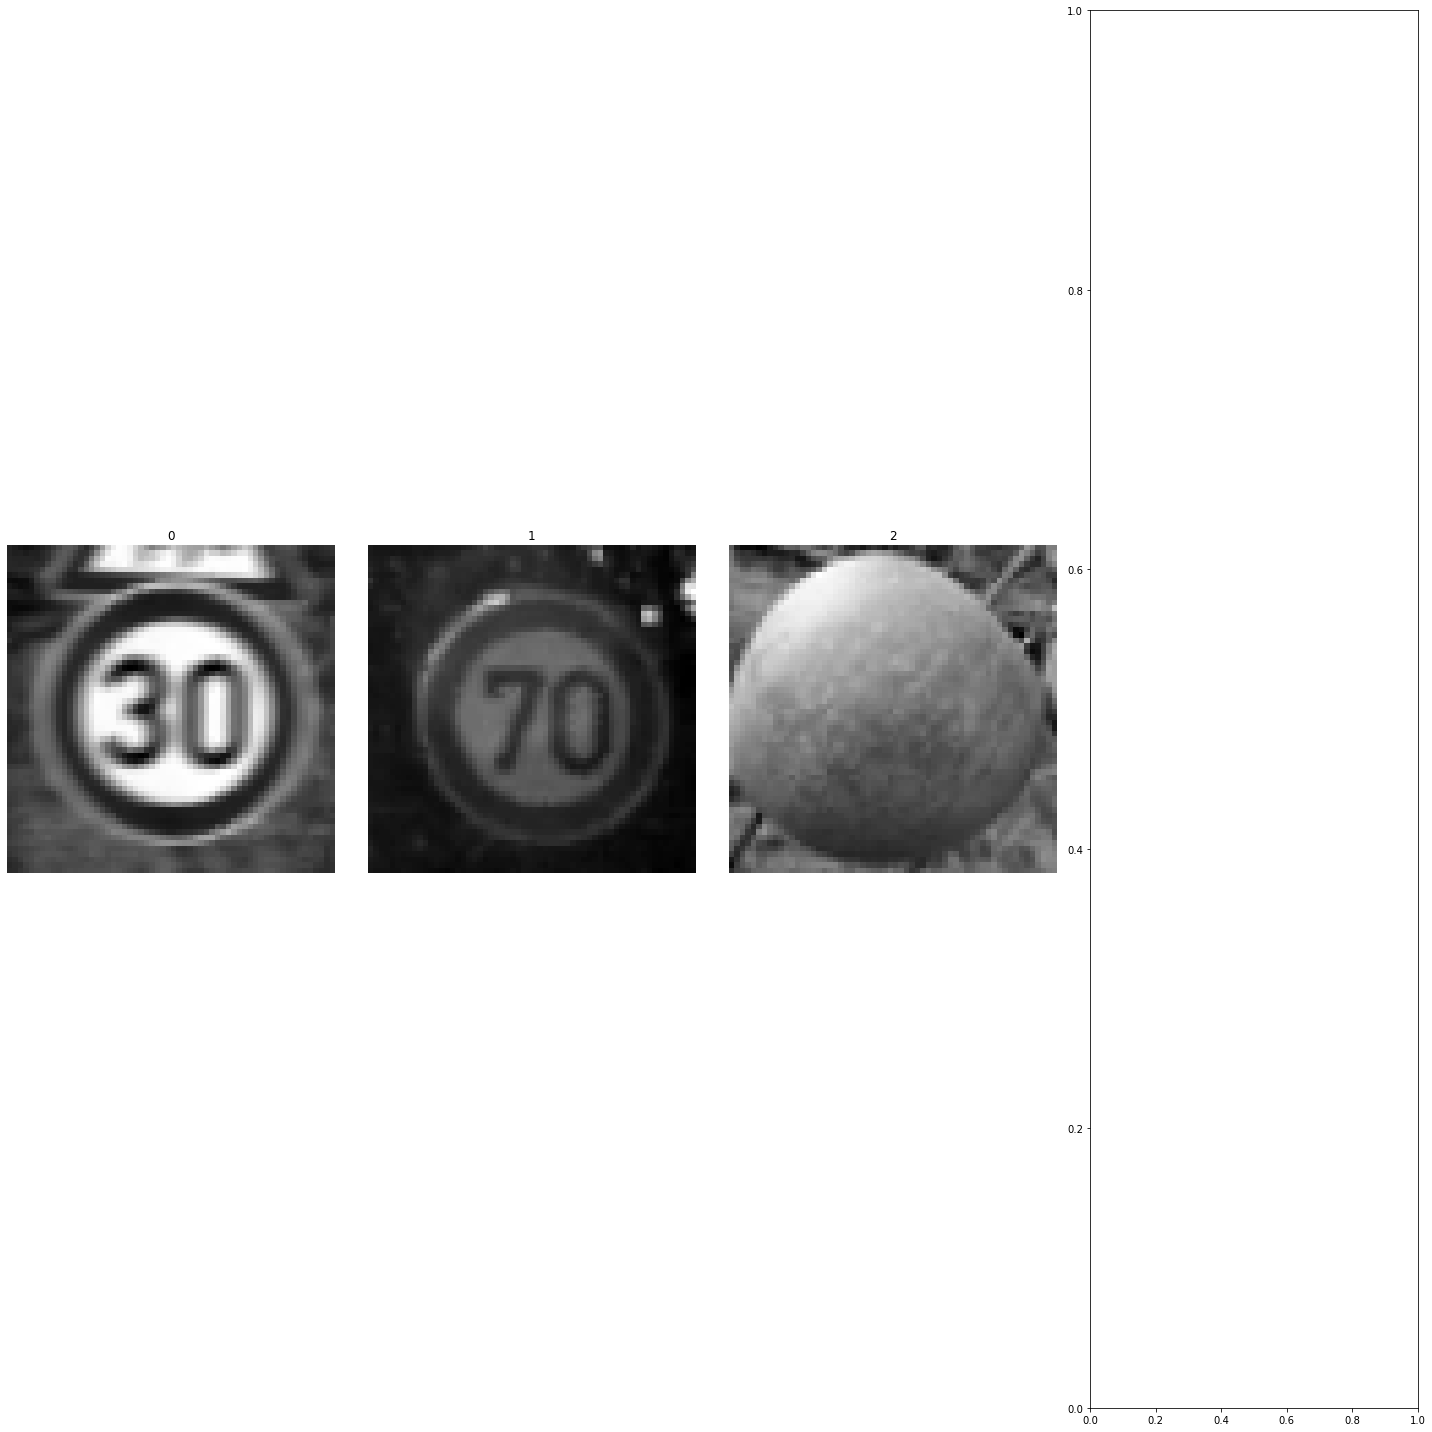

CLUSTER: 5


<Figure size 1440x1440 with 0 Axes>

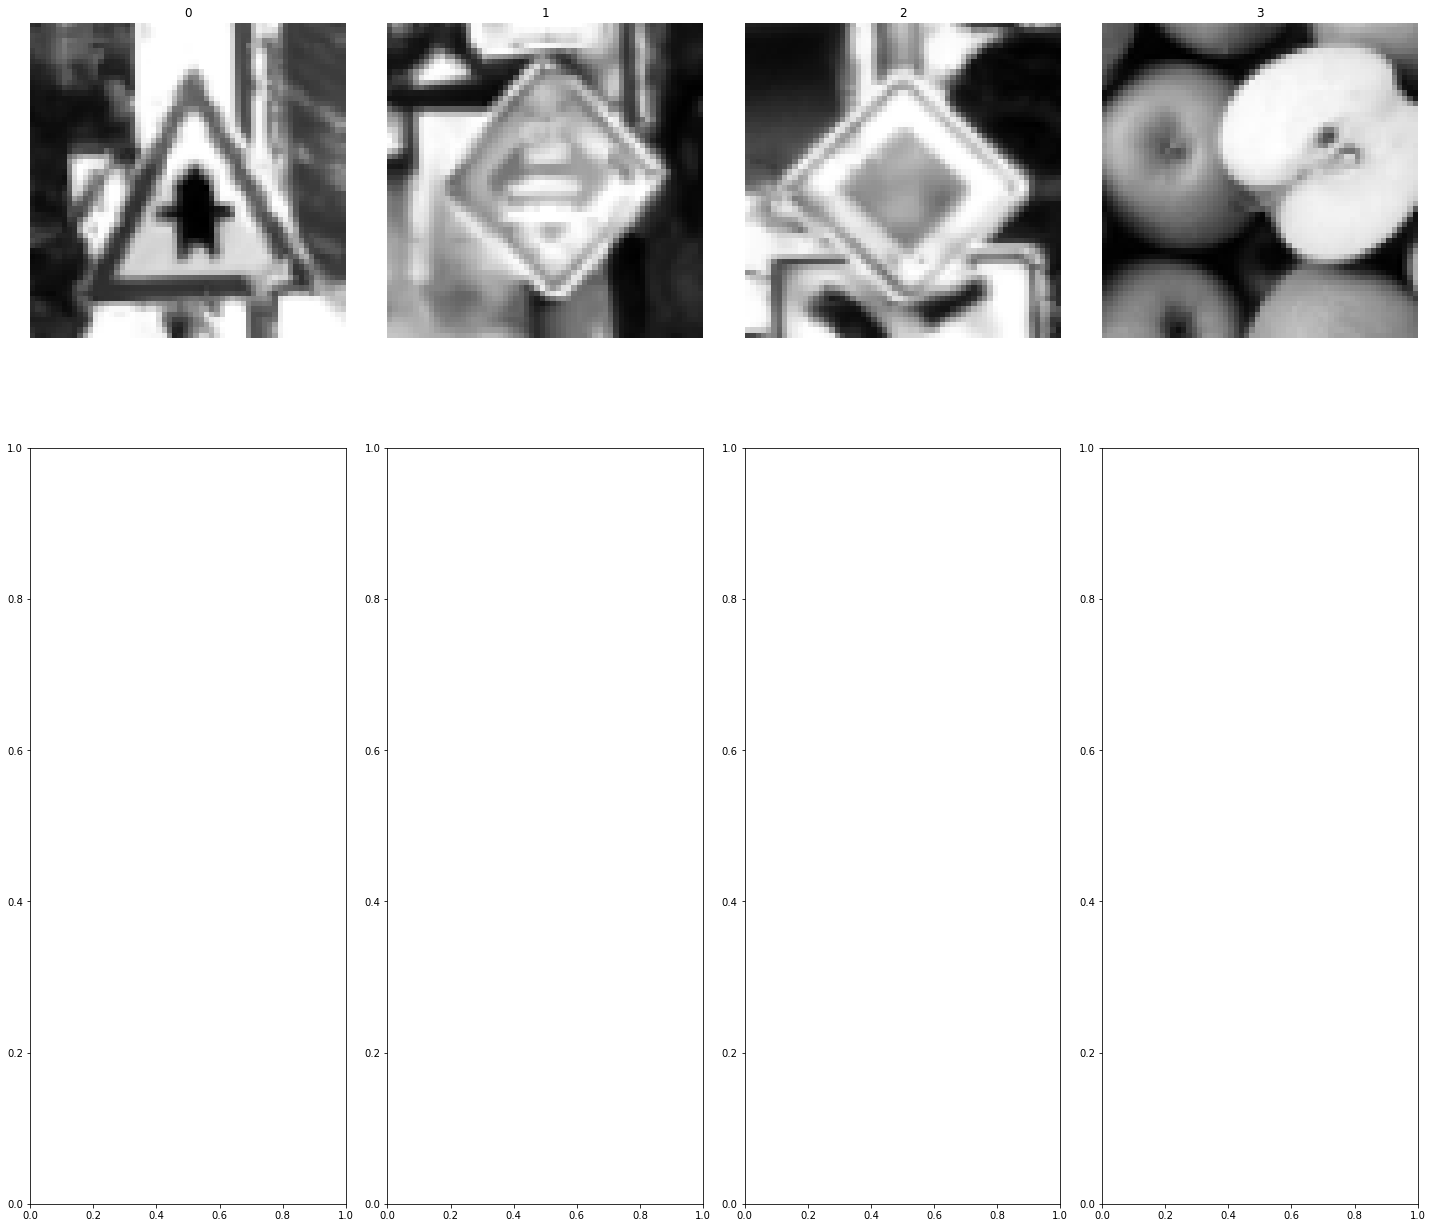

CLUSTER: 6


<Figure size 1440x1440 with 0 Axes>

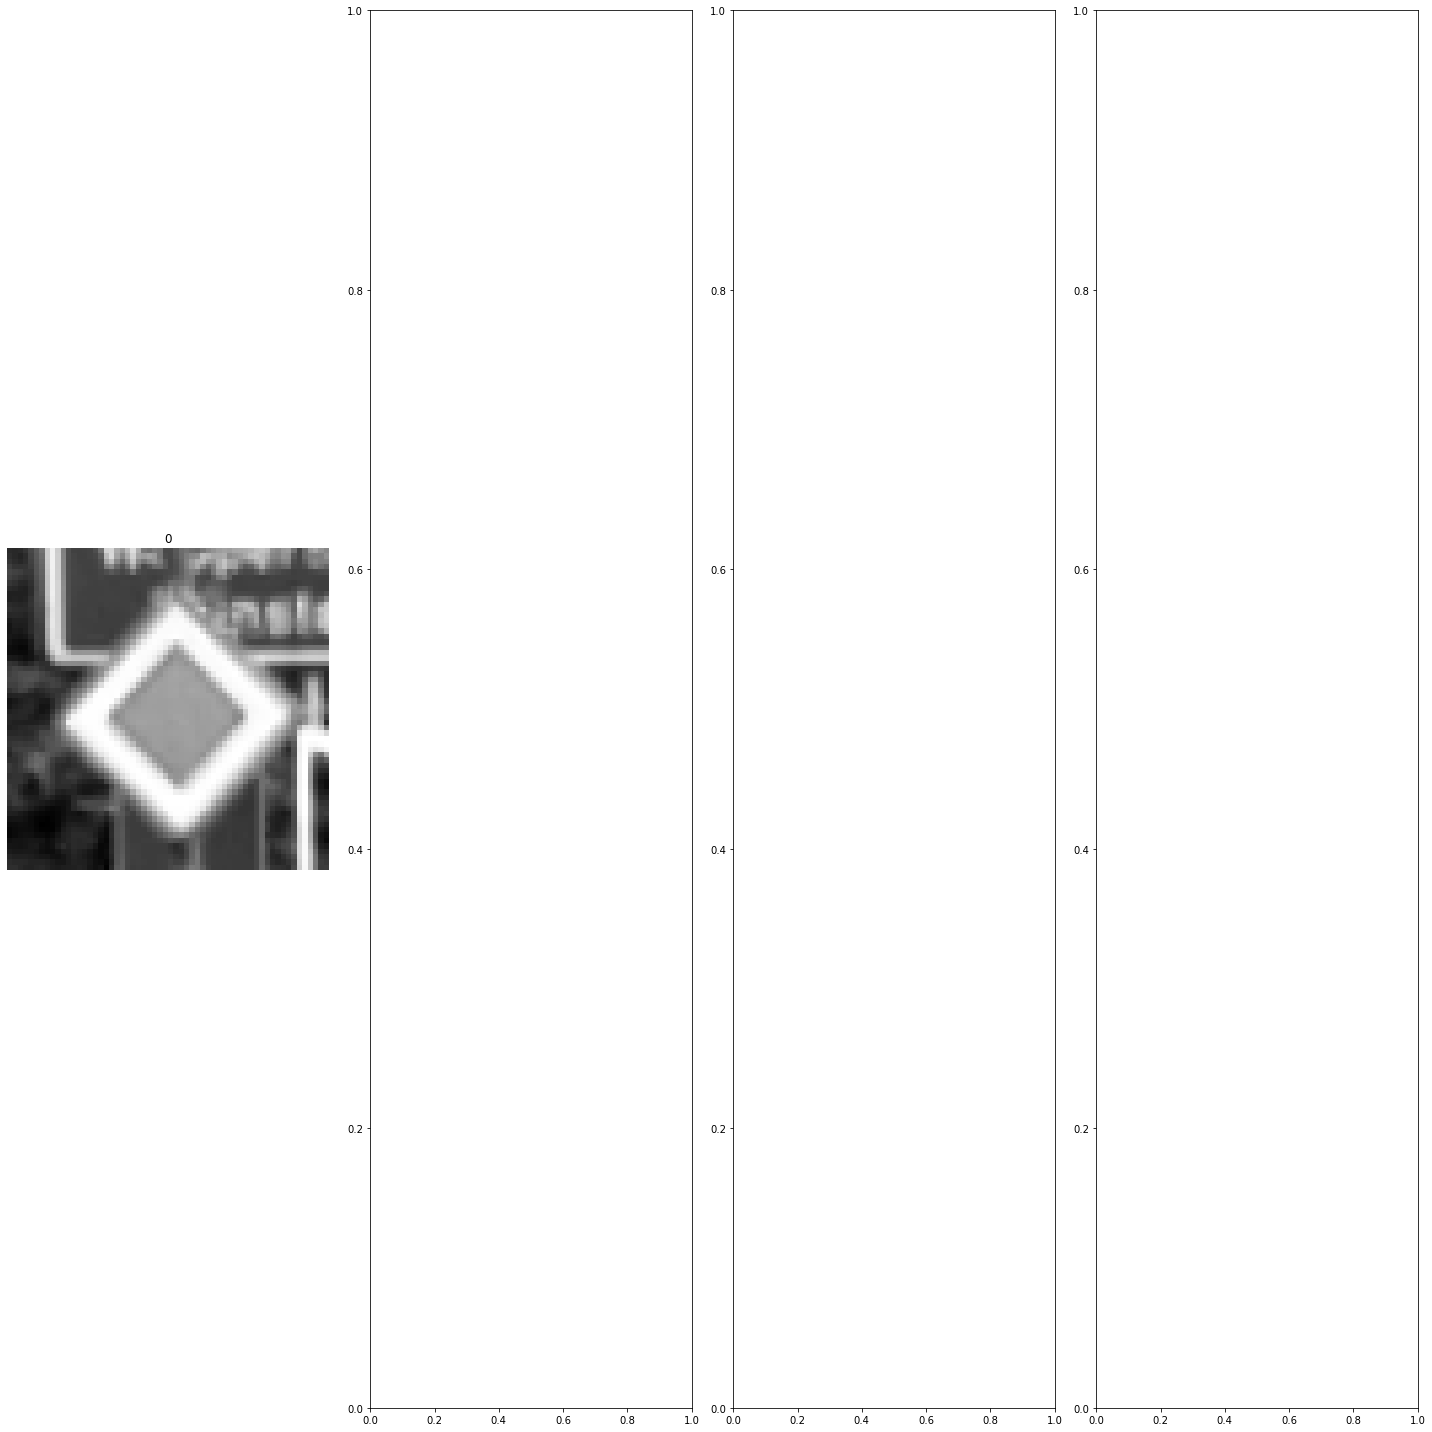

CLUSTER: 7


<Figure size 1440x1440 with 0 Axes>

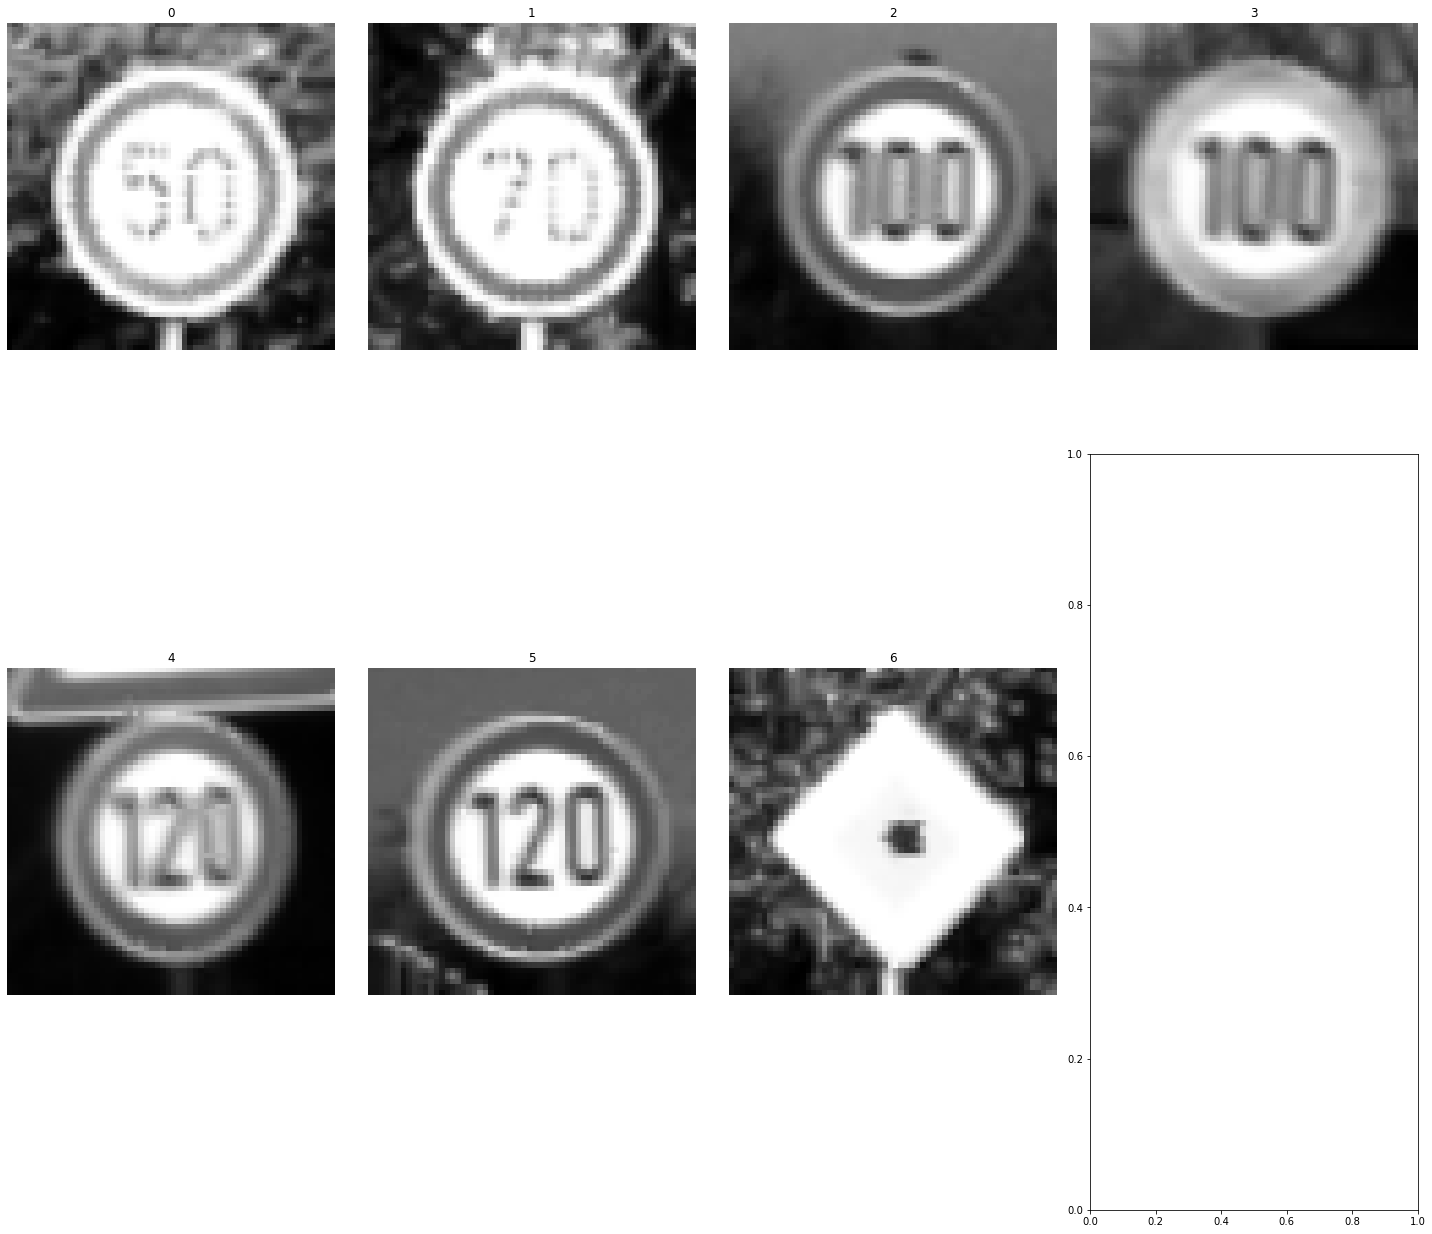

CLUSTER: 8
cluster is empty
CLUSTER: 9


<Figure size 1440x1440 with 0 Axes>

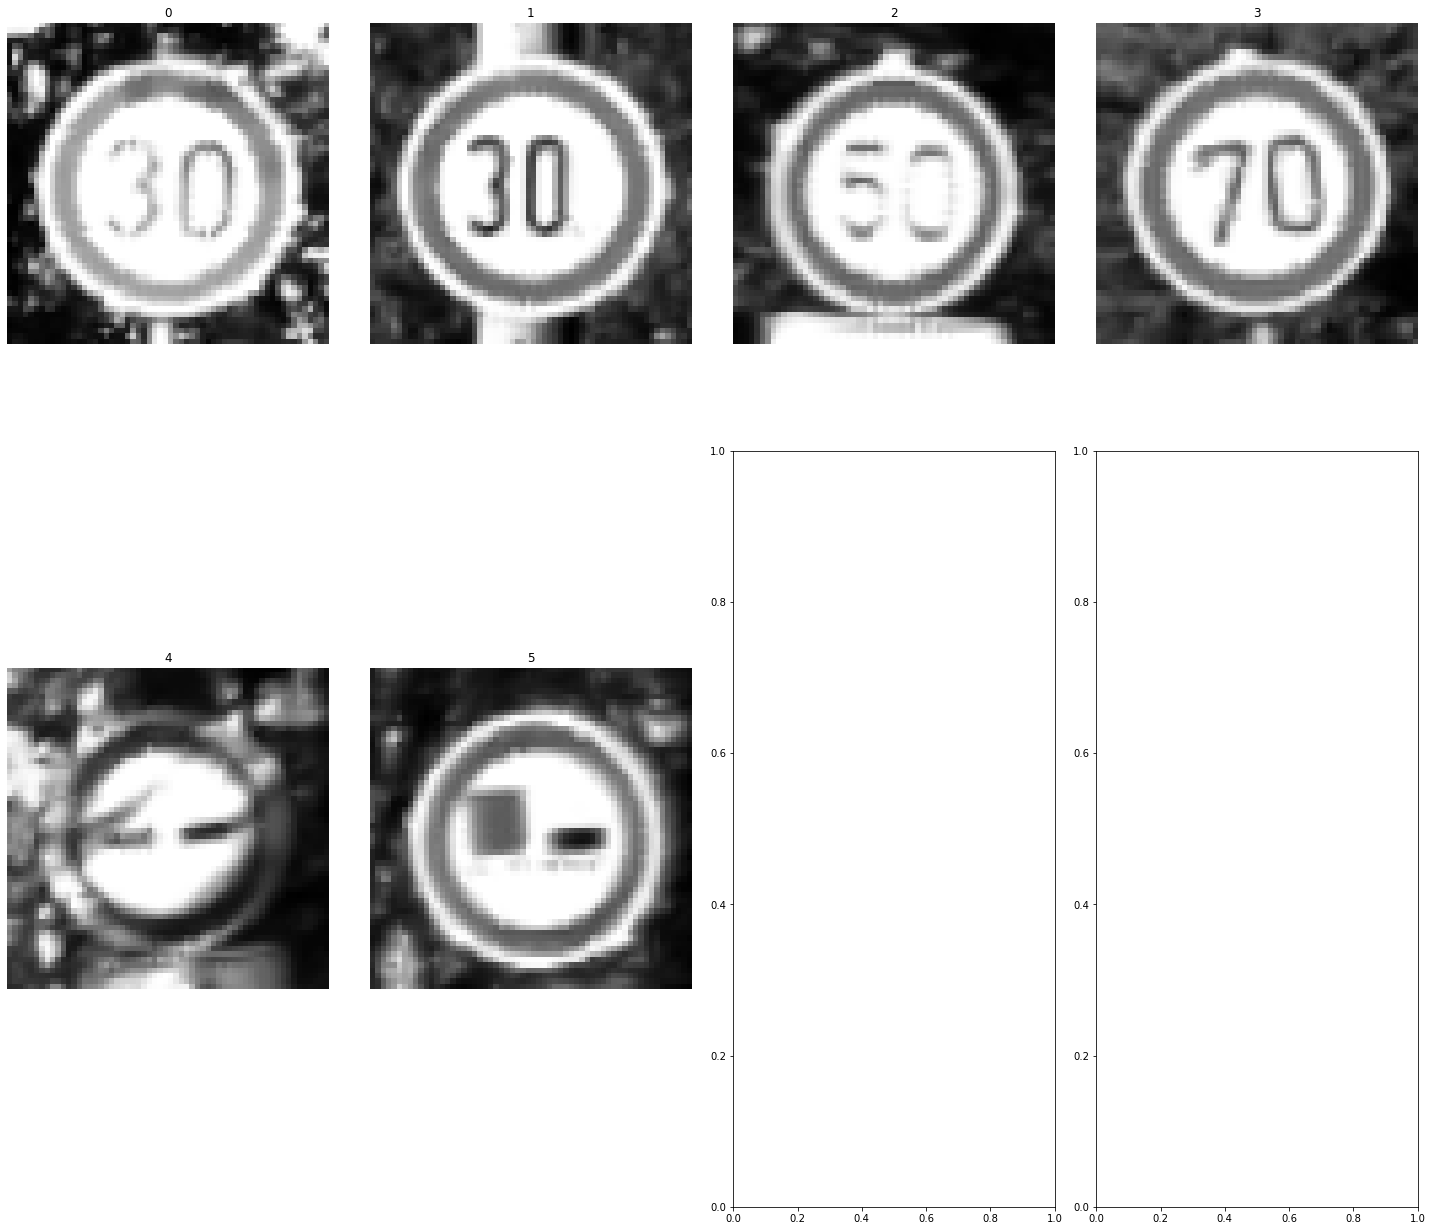

CLUSTER: 10


<Figure size 1440x1440 with 0 Axes>

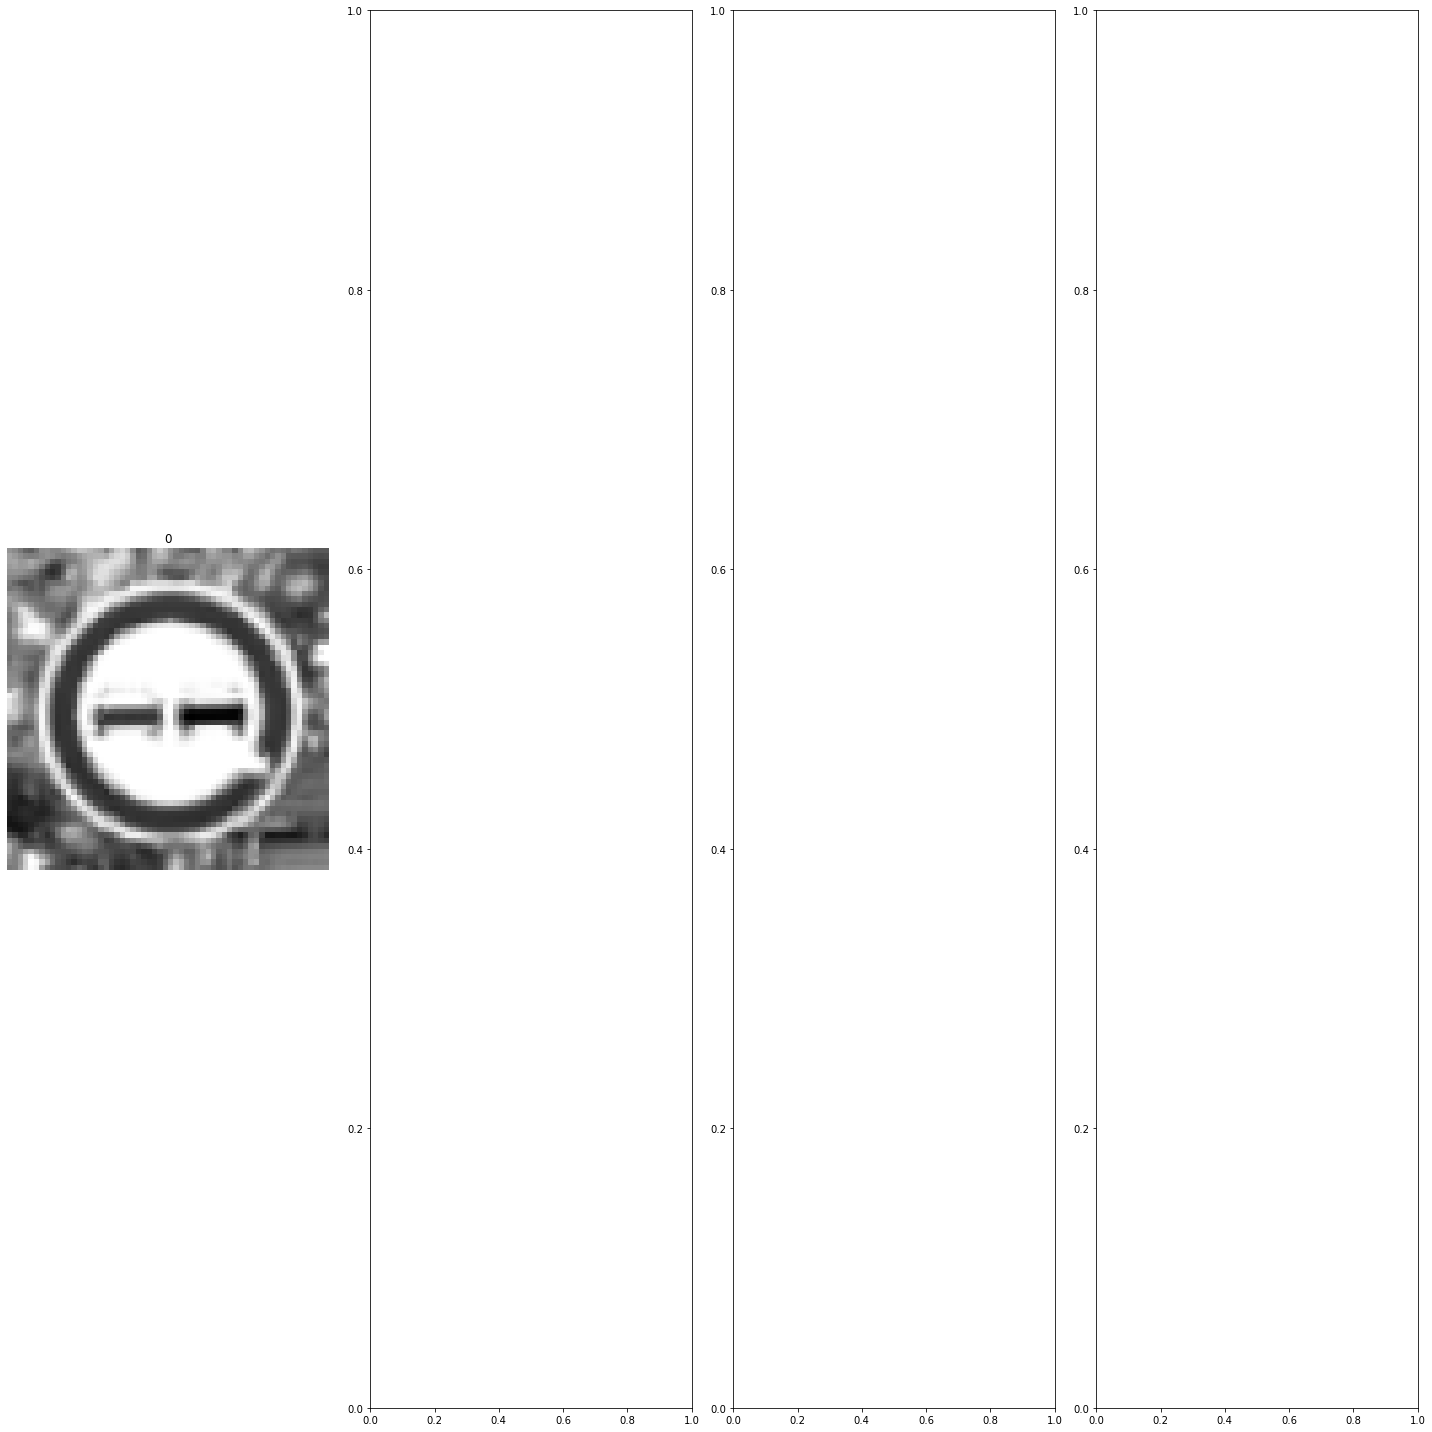

CLUSTER: 11


<Figure size 1440x1440 with 0 Axes>

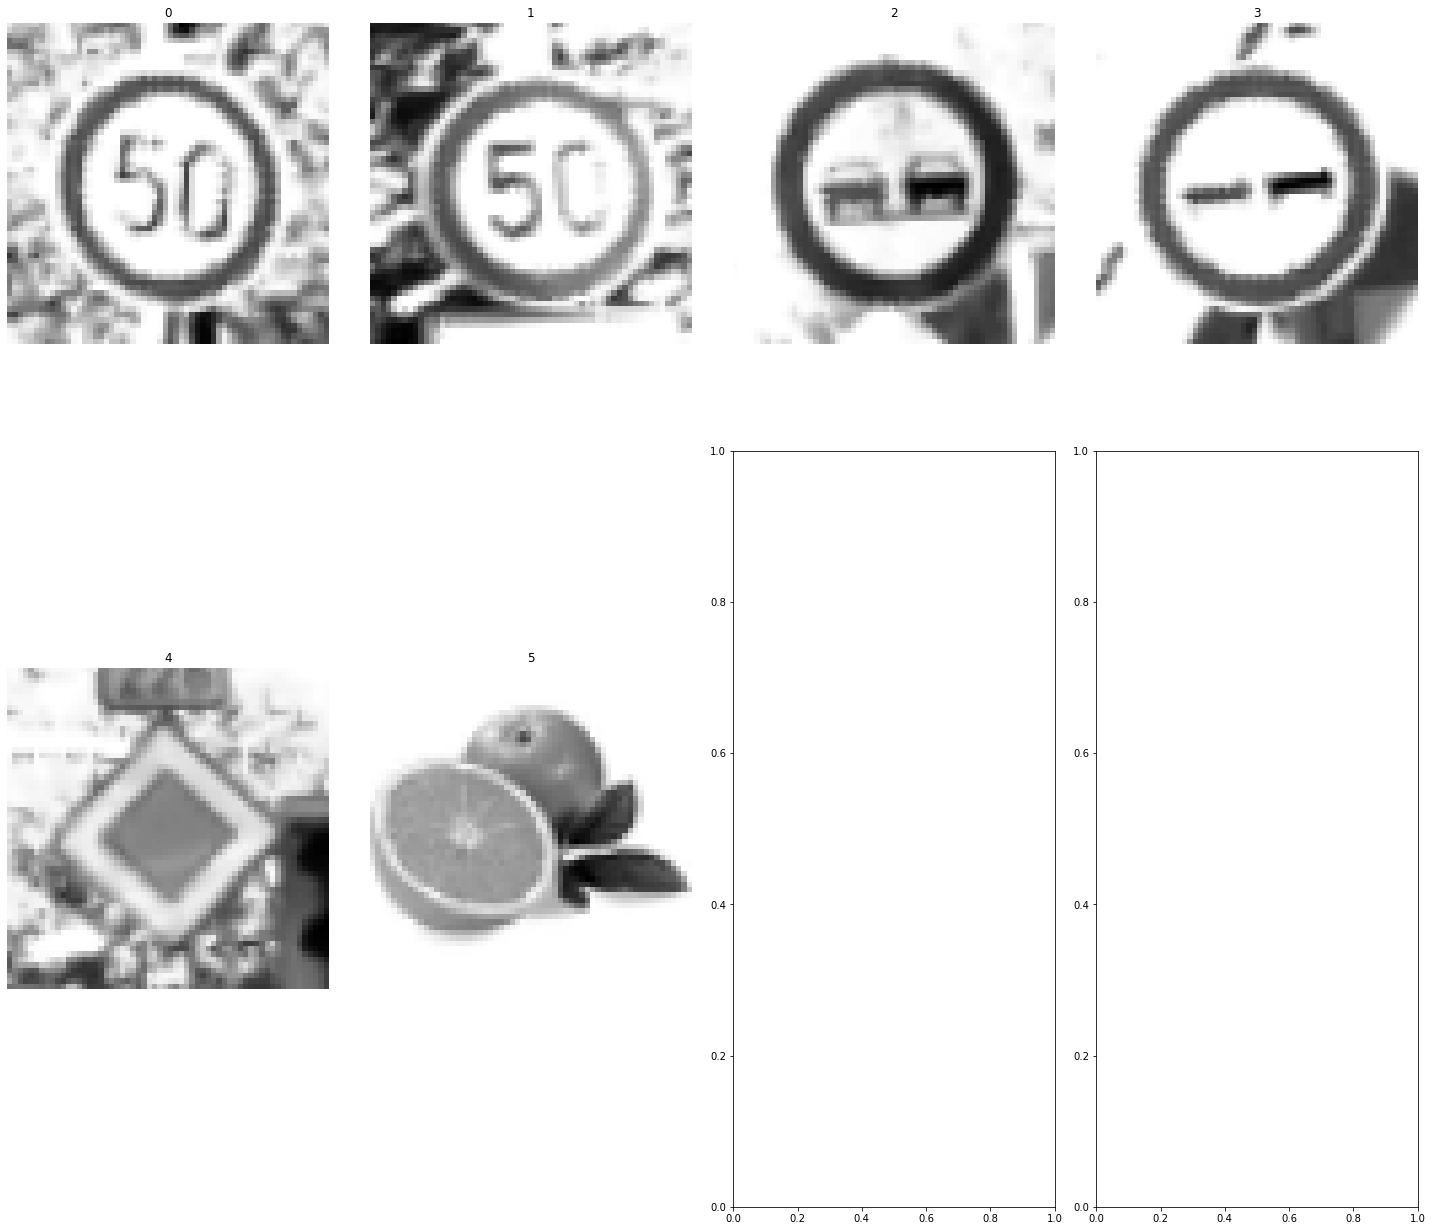

CLUSTER: 12


<Figure size 1440x1440 with 0 Axes>

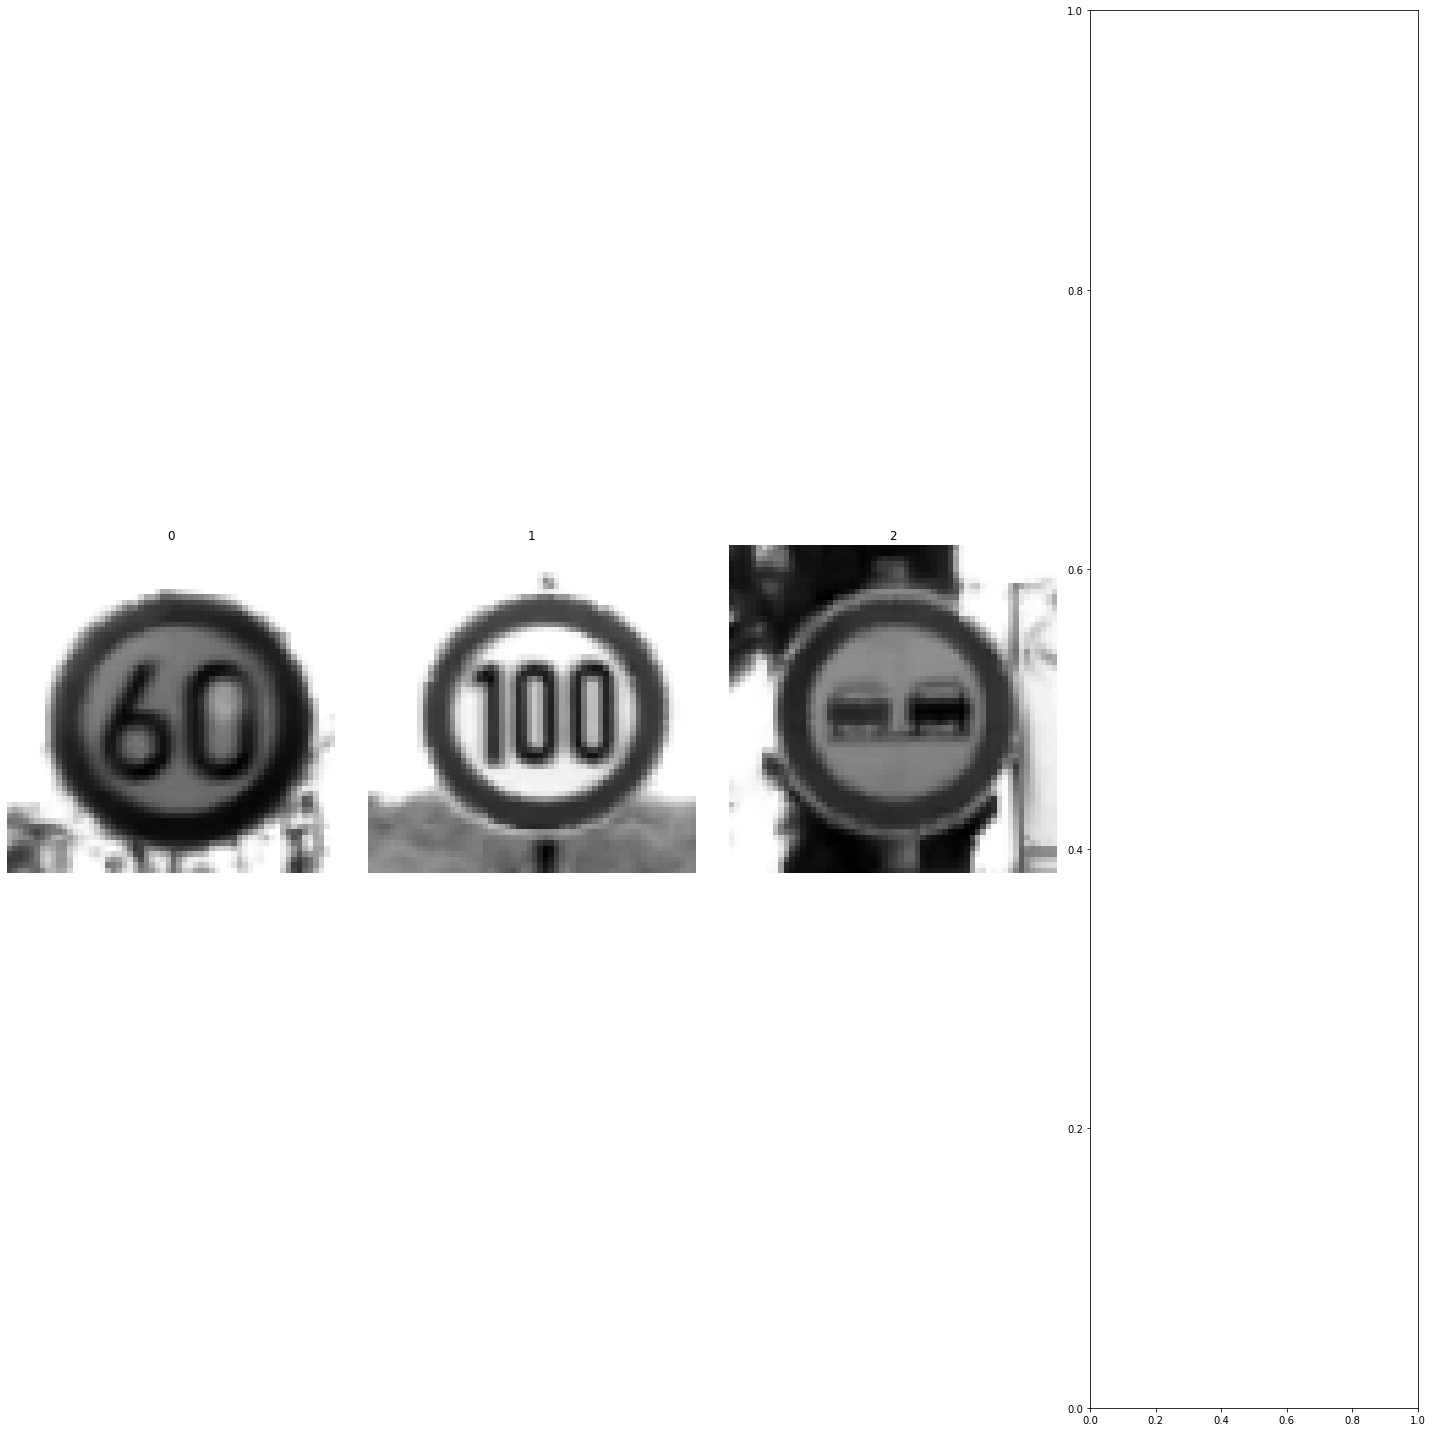

CLUSTER: 13


<Figure size 1440x1440 with 0 Axes>

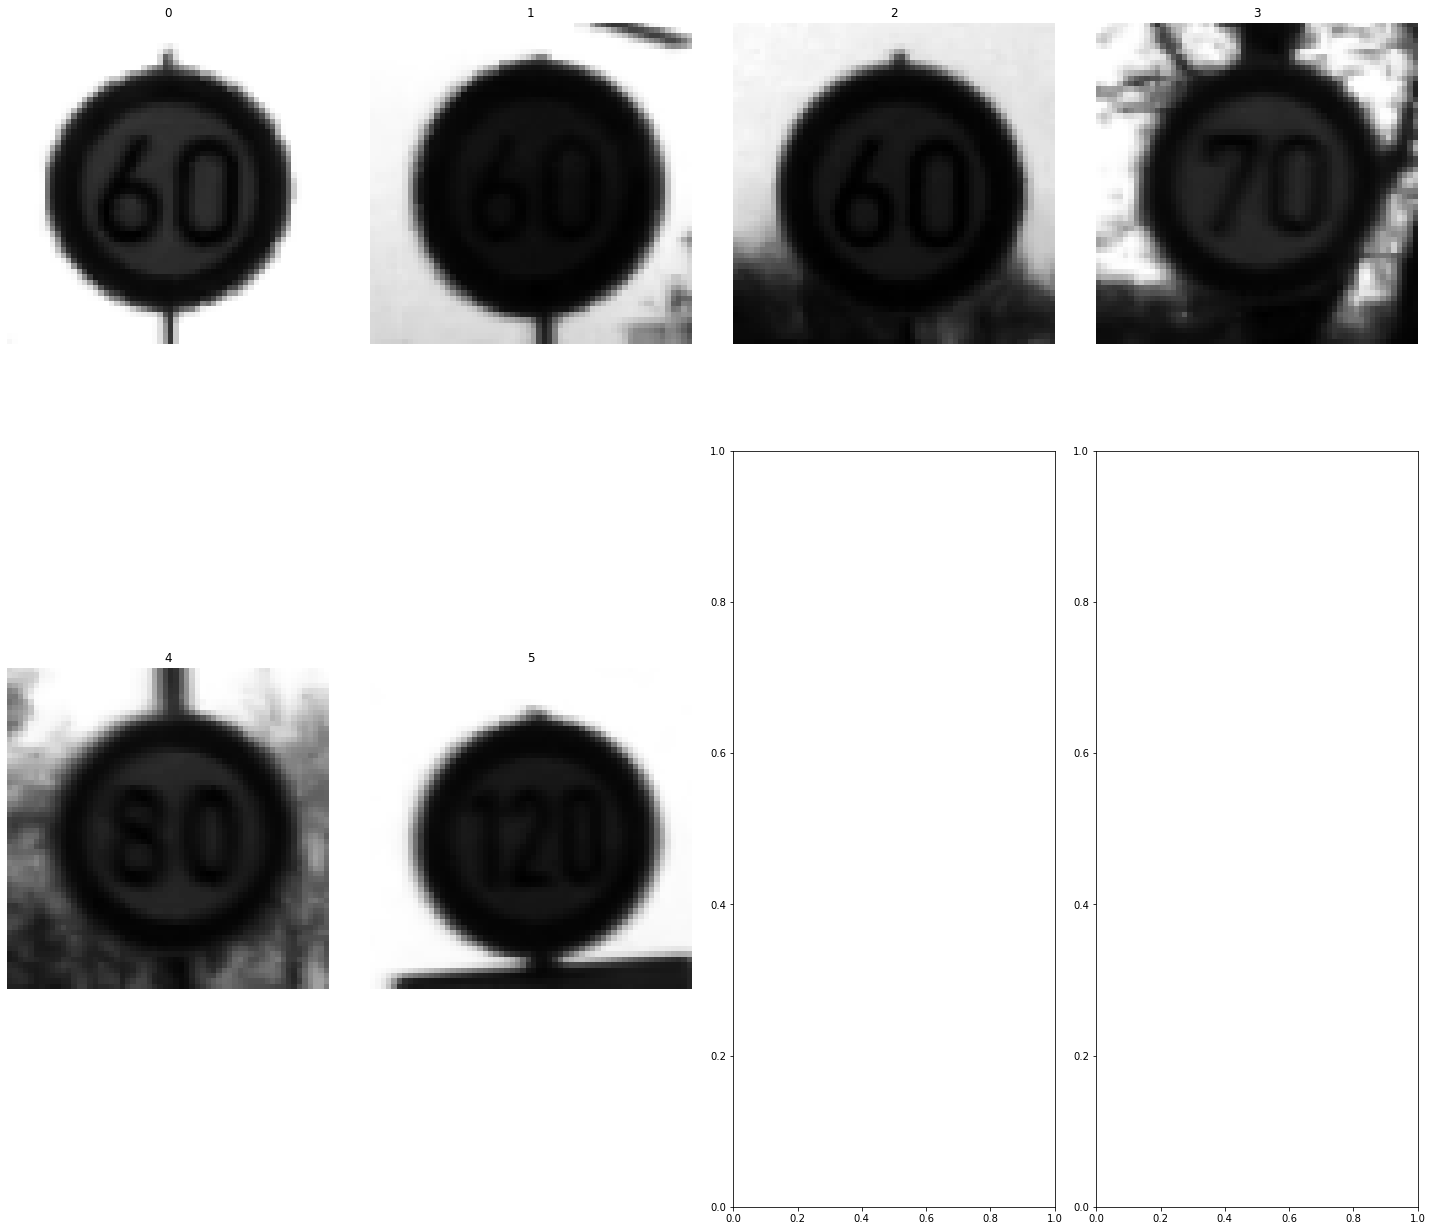

In [12]:
from kohonen import Kohonen

total_number = len(images)
vectors = []

kohonen = Kohonen(VEC_LEN, len(clusters), len(images), MIN_ALPHA, DECAY_RATE, RADIUS_REDUCTION_POINT, clusters, vectors, names)
kohonen.training(images)
result = kohonen.print_results(images)


plt.rcParams["figure.figsize"] = (20, 20)

def display_multiple_img(images, rows, cols):
    plt.gray()
    figure, ax = plt.subplots(nrows=rows, ncols=cols)
    for i in range(len(images)):
        ax.ravel()[i].imshow(images[i])
        ax.ravel()[i].set_title(i)
        ax.ravel()[i].set_axis_off()
    plt.tight_layout()
    plt.show()

cols = 4
for i, _ in enumerate(clusters):
    print("CLUSTER: " + str(i))
    rows = int(len(result[i]) / cols) + 1
    processed_images =  [img[0:3600].reshape(60, 60, 1) for img in result[i]]
#     processed_images = [image_decode(img, params[k]) for k, img in enumerate(images)]
    if(len(processed_images) > 0):
        display_multiple_img(processed_images, rows, cols)
    else:
        print("cluster is empty")